Imports

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
from DataPreparation import refine_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9162 entries, 0 to 9161
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   City                  9162 non-null   object
 1   State                 9162 non-null   object
 2   ID                    9162 non-null   int64 
 3   Source                9162 non-null   int64 
 4   TMC                   9162 non-null   int64 
 5   Severity              9162 non-null   int64 
 6   StartTime             9162 non-null   int64 
 7   EndTime               9162 non-null   int64 
 8   StartLat              9162 non-null   int64 
 9   StartLng              9162 non-null   int64 
 10  EndLat                9162 non-null   int64 
 11  EndLng                9162 non-null   int64 
 12  Distance              9162 non-null   int64 
 13  Description           9162 non-null   int64 
 14  Number                9162 non-null   int64 
 15  Street                9162 non-null   

Getting the database

In [10]:
df = pd.read_csv("DataSubsetRaw.csv")

Geographical data

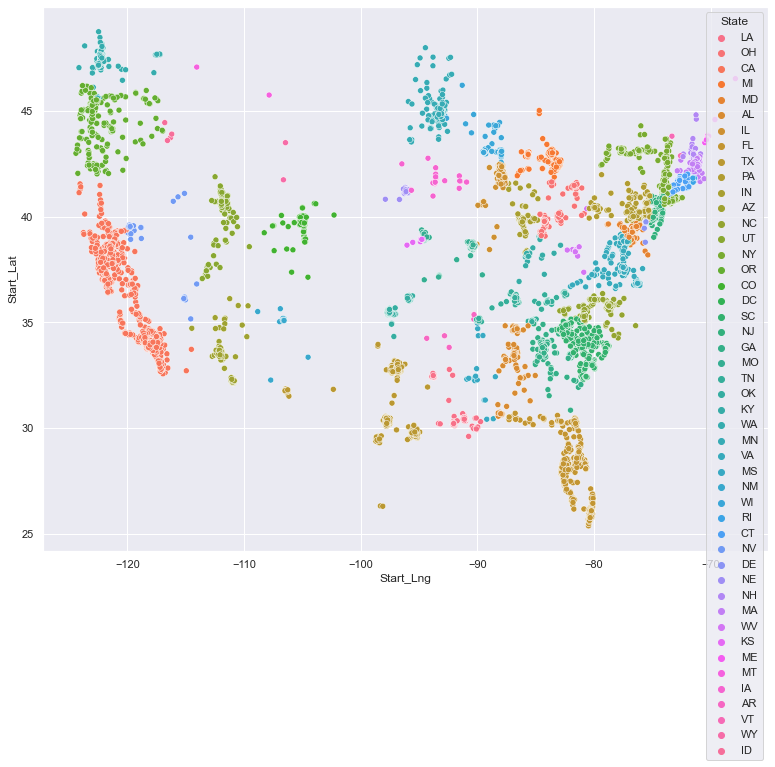

In [11]:
sns.set(rc = {'figure.figsize':(13, 10)})
sns.scatterplot(data=df, y="Start_Lat", x="Start_Lng", hue="State")
plt.show()

Weather Data and surrounding traffic data

In [12]:
df = pd.read_csv("DataSubsetRaw.csv")
df = refine_df(df)
traffic_columns = ["Amenity",       
                   "Bump",          
                   "Crossing",      
                   "GiveWay",       
                   "Junction",      
                   "NoExit",        
                   "Railway",       
                   "Roundabout",    
                   "Station",       
                   "Stop",          
                   "TrafficCalming",
                   "TrafficSignal", 
                   "TurningLoop"]
traffic_df = df.loc[:, ["Severity", "Duration", "Distance", *traffic_columns]]
traffic_df["Duration"] = pd.Series([dur.total_seconds() for dur in traffic_df["Duration"]])

weather_columns = ["Temperature",      
                   "WindChill",        
                   "Humidity",         
                   "Pressure",         
                   "Visibility",       
                   "WindDirection",    
                   "WindSpeed",        
                   "Precipitation",    
                   "WeatherCondition"]
weather_df = df.loc[:, ["Severity", "Duration", "Distance", *weather_columns]]

As shown in the below heatmap this data cannot be used to make meaningfull statements about corrolations between traffic accidents and the weather

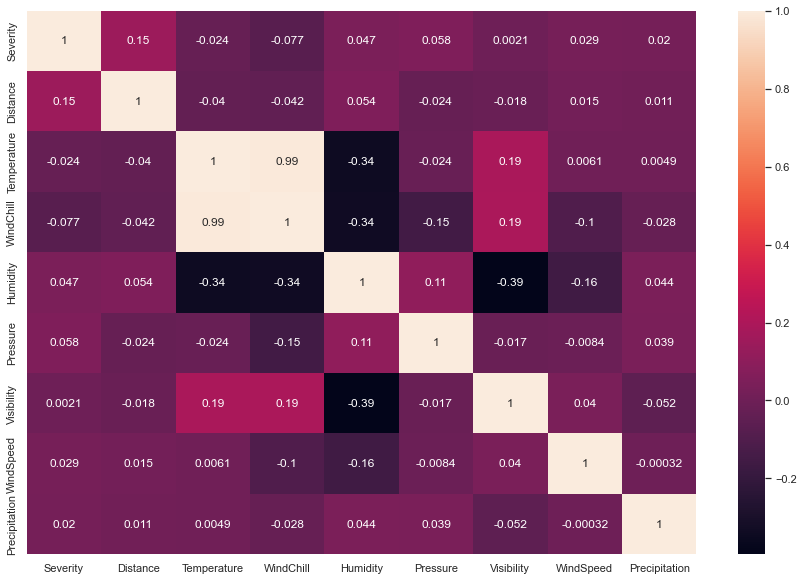

In [13]:
sns.set(rc = {'figure.figsize':(15, 10)})
sns.heatmap(weather_df.corr(), annot = True)
plt.show()

As shown in the below heatmap this data cannot be used to make statements about the relation between the surrounding traffic conditions and accidents

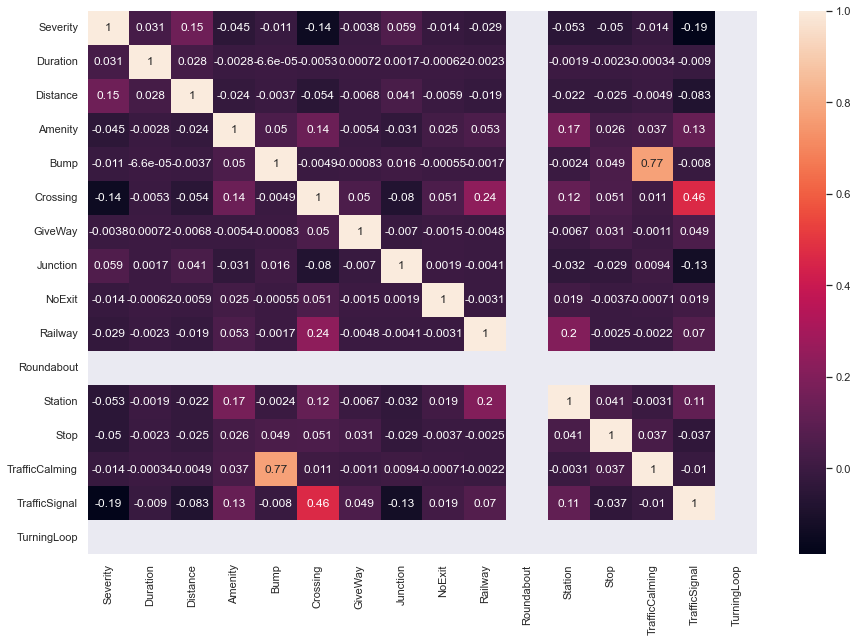

In [14]:
sns.set(rc = {'figure.figsize':(15, 10)})
sns.heatmap(traffic_df.corr(), annot = True)
plt.show()